In [ ]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np

In [ ]:
# Body fat percentage refers to the relative proportions of body weight in terms of lean body mass (muscle, bone, internal organs, and connective tissue) and body fat. You probably already know that body fat percentage is an important indicator of overall health - too little or too much body fat is associated with several health issues. This assignment is about estimating body fat percentage from other body measurements.
# a. Why is there a need to estimate body fat percentage instead of directly measuring it (e.g., we can directly measure a person’s weight, we don’t have to calculate it)? Do an internet search and answer in 2-3 sentences.
# ANSWER: Directly measuring it with extreme accuracy requires specialized equipment and expertise, making it impractical for most people to access regularly. Simply measuring a person's weight doesn't give insight as to how much of that weight is from other sources such as muscles, bones, etc.

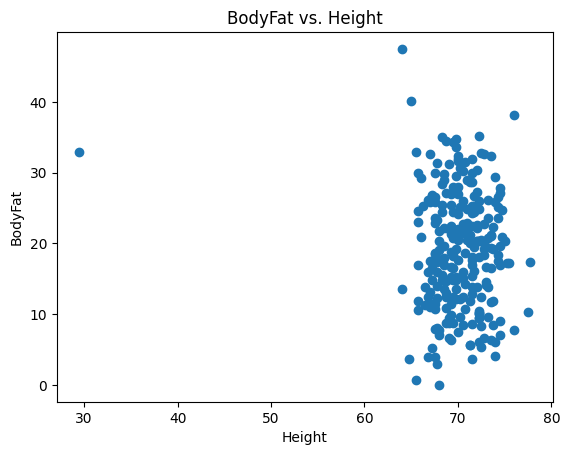

In [ ]:
# b. The bodyfat.csv file in the Linear Regression module on Canvas contains 13 measurements from subjects (all men) along with their body fat percentage. Read the file using pd.read_csv(). Plot BodyFat vs. Height (code, plot) Which should be the dependent variable? Which is the independent variable?
df = pd.read_csv('bodyfat.csv')
plt.scatter(df['Height'], df['BodyFat'])
plt.xlabel('Height')
plt.ylabel('BodyFat')
plt.title('BodyFat vs. Height')
plt.show()
# ANSWER: BodyFat is the dependent variable since BodyFat can change based on Height. Height is the independent variable because BodyFat has no bearing on Height.

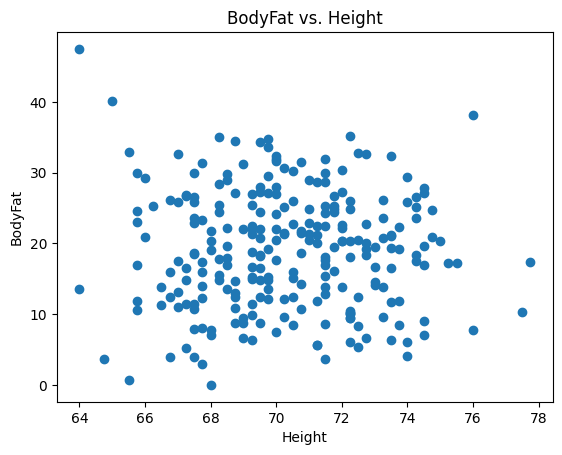

70.31075697211155

In [ ]:
# c. There is one obvious outlier in the Height column. Remove the corresponding row from the data and plot again. This will be the data used for the following questions. Confirm that the mean Height is now 70.31076. (Show: code to remove the row, plot, and calculate mean; plot).
mean_height = df['Height'].mean()
std_height = df['Height'].std()
outlier_condition = (df['Height'] > mean_height + 3*std_height) | (df['Height'] < mean_height - 3*std_height)
df_no_outlier = df[~outlier_condition]
plt.scatter(df_no_outlier['Height'], df_no_outlier['BodyFat'])
plt.xlabel('Height')
plt.ylabel('BodyFat')
plt.title('BodyFat vs. Height')
plt.show()
mean_height_no_outlier = df_no_outlier['Height'].mean()
mean_height_no_outlier

In [ ]:
# d. Create a linear model of BodyFat vs. Height. (code, output of summary(model))
X = df_no_outlier['Height']
Y = df_no_outlier['BodyFat']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())
# i. What is the R2 value?
# ANSWER: 0.001
# ii. Is this a “good” model? Why or why not?
# ANSWER: No. The R^2 value is very small, meaning Height does not explain much of the variability in BodyFat. Furthermore, the p-value is .712, which is much greater than 0.05, suggesting that Height is not a statistically significant predictor of BodyFat in this model.
# iii. What is the linear equation relating BodyFat and Height according to this model?
# ANSWER: BodyFat = 24.3412 − 0.0746 × Height

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1362
Date:                Sat, 26 Oct 2024   Prob (F-statistic):              0.712
Time:                        21:16:21   Log-Likelihood:                -887.97
No. Observations:                 251   AIC:                             1780.
Df Residuals:                     249   BIC:                             1787.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.3412     14.221      1.712      0.0

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     148.2
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           4.60e-27
Time:                        21:16:23   Log-Likelihood:                -829.43
No. Observations:                 251   AIC:                             1663.
Df Residuals:                     249   BIC:                             1670.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.8889      2.579     -4.610      0.0

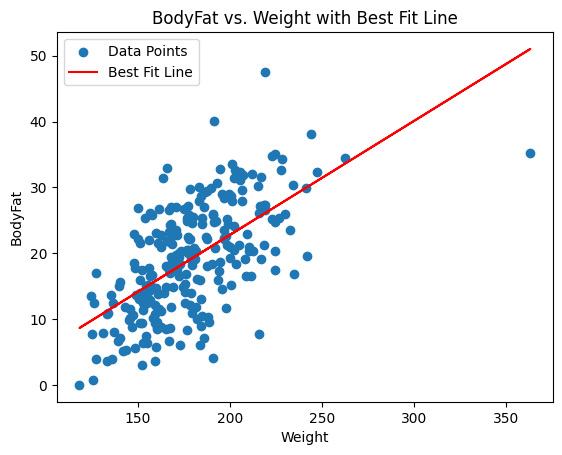

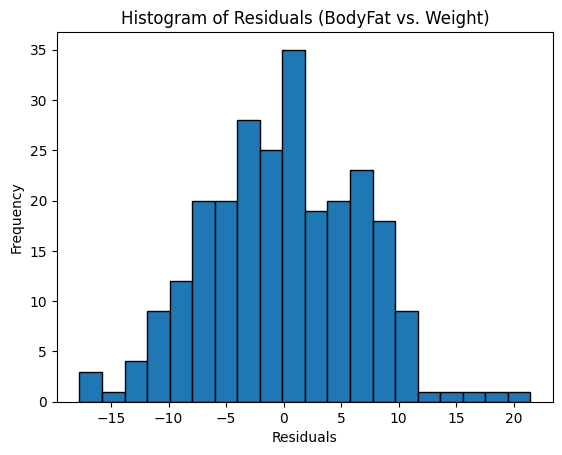

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,14.102173,0.585383,12.582684,15.621663,-3.139442,31.343789
1,40.093254,1.774558,35.487003,44.699504,22.311747,57.874761


In [ ]:
# e. Create a linear model of BodyFat vs. Weight. (code, output of summary(model))
X = df_no_outlier['Weight']
Y = df_no_outlier['BodyFat']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())
# i. What is the R2 value?
# ANSWER: 0.373
# ii. Is this a better model than that based on Height? Why or why not?
# ANSWER: Yes. The R^2 value is significantly higher than the R^2 value from the previous model. The p value is significantly smaller than the p value from the previous model.
# iii. What is the linear equation relating BodyFat and Weight according to this model?
# ANSWER: BodyFat = −11.8889 + 0.1733 × Weight
# iv. Plot BodyFat vs. Weight and overlay the best fit line. Use a different color for the line. (plot, code)
plt.scatter(df_no_outlier['Weight'], df_no_outlier['BodyFat'], label='Data Points')
plt.xlabel('Weight')
plt.ylabel('BodyFat')
plt.title('BodyFat vs. Weight with Best Fit Line')
best_fit_line = model.params['const'] + model.params['Weight'] * df_no_outlier['Weight']
plt.plot(df_no_outlier['Weight'], best_fit_line, color='red', label='Best Fit Line')
plt.legend()
plt.show()
# v. Plot the histogram of residuals (plot, code). Does this show an approximately normal distribution?
residuals = model.resid
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (BodyFat vs. Weight)')
plt.show()
# ANSWER: Yes
# vi. From the model, predict the BodyFat for two persons: Person A weighs 150 lbs, Person B weighs 300 lbs. Include the 99% confidence intervals for the predictions. In which prediction (for Person A or B), are you more confident? Why?
new_weights = pd.DataFrame({'const': 1, 'Weight': [150, 300]})
predictions = model.get_prediction(new_weights)
predicted_summary = predictions.summary_frame(alpha=0.01)
predicted_summary
# ANSWER: The prediction for Person A is more precise because the weight of 150 lbs is closer to the mean range of the dataset, leading to a tighter confidence interval. In contrast, the prediction for 300 lbs is less precise, reflected by a much wider interval, indicating higher uncertainty.

In [ ]:
# f. Create a linear model of BodyFat vs. Weight and Height. (code, output of summary(model))
X = df_no_outlier[['Weight', 'Height']]
Y = df_no_outlier['BodyFat']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())
# i. What is the R2 value?
# ANSWER: 0.509
# ii. Is this a better model than that based only on Weight or Height? Why or why not?
# ANSWER: Yes. The R^2 value is significantly higher than the R^2 value from the previous models. The p value is significantly smaller than the p value from the previous models.
# iii. What is the linear equation relating BodyFat, Weight and Height according to this model?
# ANSWER: BodyFat = 72.5244 + 0.2319 × Weight − 1.3498 × Height
# iv. From the model, predict the BodyFat for two persons: Person A weighs 150 lbs, Person B weighs 300 lbs. Both persons have height=70”. Include the 99% confidence intervals for the predictions. In which prediction (for Person A or B), are you more confident? Why?
new_data = pd.DataFrame({'const': 1, 'Weight': [150, 300], 'Height': [70, 70]})
predictions = model.get_prediction(new_data)
predicted_summary = predictions.summary_frame(alpha=0.01)
predicted_summary
# ANSWER: The model is more confident in predicting BodyFat for Person A because their weight is closer to the typical range observed in the dataset, resulting in a tighter confidence interval.

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     128.7
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           4.50e-39
Time:                        21:16:27   Log-Likelihood:                -798.68
No. Observations:                 251   AIC:                             1603.
Df Residuals:                     248   BIC:                             1614.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.5244     10.426      6.956      0.0

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,12.830683,0.541069,11.426176,14.235190,-2.459063,28.120429
1,47.622514,1.815980,42.908596,52.336432,31.684361,63.560667


<ipython-input-78-721d0514d29b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier['BMI'] = df_no_outlier['Weight'] / (df_no_outlier['Height'] ** 2)


                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     275.7
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           3.44e-42
Time:                        21:16:30   Log-Likelihood:                -794.49
No. Observations:                 251   AIC:                             1593.
Df Residuals:                     249   BIC:                             1600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.8594      2.553     -8.955      0.0

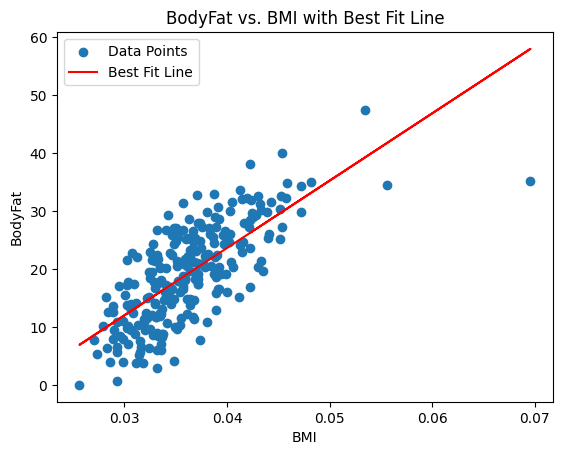

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,12.711243,0.529030,11.338030,14.084457,-2.294409,27.716896
1,48.281853,1.794802,43.623053,52.940652,32.629751,63.933955


In [ ]:
# g. Add a new transformed variable BMI = Weight/Height2 to the dataset. Create a linear model of BodyFat vs. BMI.
# i. Give sm.formula.ols() code, output of results.summary()
df_no_outlier['BMI'] = df_no_outlier['Weight'] / (df_no_outlier['Height'] ** 2)
model = smf.ols('BodyFat ~ BMI', data=df_no_outlier).fit()
print(model.summary())
# ii. Is this a better model than the previous models? Why or why not?
# ANSWER: Yes, this is a better model than the previous models. The R^2 value is 0.525, which is higher than the R^2 values of the earlier models. The p value is smaller than the values of the earlier models.
# iii. What is the equation relating BodyFat, Weight, and Height according to this model? Is this a linear or nonlinear equation?
# ANSWER: BodyFat = −22.8594 + 1161.9732 × BMI
# iv. Plot BodyFat vs. BMI and overlay the best fit model as a straight line. (code, plot)
plt.scatter(df_no_outlier['BMI'], df_no_outlier['BodyFat'], label='Data Points')
plt.xlabel('BMI')
plt.ylabel('BodyFat')
plt.title('BodyFat vs. BMI with Best Fit Line')
bmi_values = df_no_outlier['BMI']
best_fit_line = model.params['Intercept'] + model.params['BMI'] * bmi_values
plt.plot(bmi_values, best_fit_line, color='red', label='Best Fit Line')
plt.legend()
plt.show()
# v. From the model, predict the BodyFat for two persons: Person A weighs 150 lbs, Person B weighs 300 lbs. Both persons have height=70”. Include the 99% confidence intervals for the predictions.
person_a_bmi = 150 / (70 ** 2)
person_b_bmi = 300 / (70 ** 2)
new_data_bmi = pd.DataFrame({'BMI': [person_a_bmi, person_b_bmi]})
predictions_bmi = model.get_prediction(new_data_bmi)
predicted_summary_bmi = predictions_bmi.summary_frame(alpha=0.01)
predicted_summary_bmi
# vi.Body Mass Index (BMI) is actually defined as a person’s weight in kilograms divided by the square of height in meters but your data has Weight in pounds and Height in inches. Thus, the correct BMI transformation should have been BMI = (Weight/2.20)/(Height*0.0254)2. Would using this correct BMI transformation result in a different model from what was calculated? Why or why not?
# ANSWER: Scaling transformations typically do not change the overall fit of the model, meaning the R² value and significance should remain the same. The coefficients would adjust to match the scaled BMI variable, but the quality of the model would not fundamentally change.

<ipython-input-79-ab2c96d9f236>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier['AgeGroup'] = pd.cut(
<ipython-input-79-ab2c96d9f236>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier['PredictedBodyFat'] = model.predict(df_no_outlier)


                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     109.2
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           5.09e-45
Time:                        21:16:33   Log-Likelihood:                -782.11
No. Observations:                 251   AIC:                             1572.
Df Residuals:                     247   BIC:                             1586.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -22.8344      2

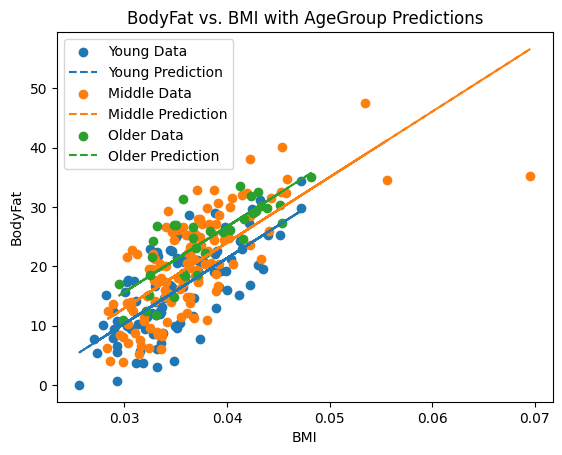

In [ ]:
# h. Add a new categorical variable (factor) AgeGroup to the dataset. AgeGroup should have three values: “Young” for Age≤40, “Middle” for Age between 40 and 60, and “Older” for Age>60.
# i. Show Pandas code that adds the AgeGroup variable. This can be done with assign and the cut() function like so: pd.cut(bodyfat.Age, bins=[-np.inf, 40, 60, np.inf], labels=["Young", "Middle", "Older"])[Code]
df_no_outlier['AgeGroup'] = pd.cut(
    df_no_outlier['Age'],
    bins=[-np.inf, 40, 60, np.inf],
    labels=["Young", "Middle", "Older"]
)
# ii. Create a linear model of BodyFat vs. BMI and AgeGroup.[Code, output of summary(model)]
model = smf.ols('BodyFat ~ BMI + AgeGroup', data=df_no_outlier).fit()
print(model.summary())
# iii. How many dummy (i.e., 0-1) variables were created in the model?
# ANSWER: Two dummy variables were created for the AgeGroup category: AgeGroup[T.Middle] and AgeGroup[T.Older]
# iv. Is this a better model than the previous models? Why or why not?
# ANSWER: Yes, this is a better model than the previous models. The R^2 value is 0.525, which is higher than the R^2 values of the earlier models. The p value is smaller than the values of the earlier models.
# v. What are the set of equations relating BodyFat, BMI, and AgeGroup according to this model?
# ANSWER: For "Young": BodyFat = − 22.8344 + 1105.0576 × BMI. For "Middle": BodyFat = −22.8344 + 1105.0576 × BMI + 2.6113. For "Older": BodyFat = −22.8344 + 1105.0576 × BMI + 5.3074.
# vi. Plot BodyFat vs. BMI and overlay the model predictions (Hint: add a new column with predictions and plot the predictions using geom_line. You should see multiple lines, one for each value of the discrete variable). [Code, plot]
df_no_outlier['PredictedBodyFat'] = model.predict(df_no_outlier)
for age_group in df_no_outlier['AgeGroup'].unique():
    group_data = df_no_outlier[df_no_outlier['AgeGroup'] == age_group]
    plt.scatter(group_data['BMI'], group_data['BodyFat'], label=f'{age_group} Data')
    plt.plot(group_data['BMI'], group_data['PredictedBodyFat'], label=f'{age_group} Prediction', linestyle='--')
plt.xlabel('BMI')
plt.ylabel('BodyFat')
plt.title('BodyFat vs. BMI with AgeGroup Predictions')
plt.legend()
plt.show()

In [ ]:
def colab2pdf():
  # @title Download Notebook in PDF Format{display-mode:'form'}
  !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null;
  import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml,re;locale.setlocale(locale.LC_ALL,'en_US.UTF-8');warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning);
  %matplotlib inline
  def convert(b):
    try:
      s.value='🔄 Converting';b.disabled=True
      n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))
      p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.utcnow().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);nb=nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4)
      u=[u for c in nb.cells if c.get('cell_type')=='markdown' for u in re.findall(r'!\[.*?\]\((https?://.*?)\)',c['source']) if requests.head(u,timeout=5).status_code!=200]
      if u:raise Exception(f"Bad Image URLs: {','.join(u)}")
      nb.cells=[cell for cell in nb.cells if '--Colab2PDF' not in cell.source]
      nb=nbformat.v4.new_notebook(cells=nb.cells or [nbformat.v4.new_code_cell('#')]);nbformat.validator.normalize(nb)
      nbformat.write(nb,(p/f'{n.stem}.ipynb').open('w',encoding='utf-8'))
      with (p/'config.yml').open('w', encoding='utf-8') as f: yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)
      !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
      google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'✅ Downloaded: {n.stem}.pdf'
    except Exception as e:s.value=f'❌ {str(e)}'
    finally:b.disabled=False
  if not pathlib.Path('/usr/local/bin/quarto').exists():
    !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' && dpkg -i quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet && rm quarto-linux-amd64.deb
  b=ipywidgets.widgets.Button(description='⬇️ Download');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))
colab2pdf() # | Colab2PDF v1.6 | https://github.com/drengskapur/colab2pdf | GPL-3.0-or-later |

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>